In [1]:
import geopandas as gpd

data = gpd.read_file("datos/paraguay_2012_departamentos_wgs84_1.shp")

print(data.crs)

{'init': 'epsg:32721'}


In [ ]:
data.head()

In [ ]:
print(len(data))

In [ ]:
%matplotlib inline
data.plot()

In [ ]:
py_wgs84 = data.to_crs({'init': 'epsg:4326'})

In [ ]:
py_wgs84.head()

In [ ]:
py_wgs84.plot()

In [ ]:
py_wgs84.to_file("datos/paraguay_dpto_WGS84.shp")

In [ ]:
py_wgs84.to_file("datos/paraguay_dpto.json", driver="GeoJSON")

In [19]:

comisaria = gpd.read_file("datos/Comisarias de Paraguay.csv", encoding="UTF-8")

In [20]:
comisaria.head()

,FID,NOMBRE,X,Y,MI_STYLE,MI_PRINX,SP_GEOMETRY,SP_GEOMETRY_AS_TEXT,SP_GEOGRAPHY,geometry
0,Comisarias de Paraguay.fid--35f074e8_16db7c9e8...,CRIA 1.ª (SAN LORENZO),-57.507292,-25.345119,,1,POINT (-57.50729208 -25.345118969999998),POINT (-57.50729208 -25.345118969999998),[B@7be967d7,None
1,Comisarias de Paraguay.fid--35f074e8_16db7c9e8...,CRIA 3.ª (LUQUE),-57.493068,-25.26573,,2,POINT (-57.49306812 -25.26572997),POINT (-57.49306812 -25.26572997),[B@4fc23c66,None
2,Comisarias de Paraguay.fid--35f074e8_16db7c9e8...,CRIA 7.ª (ÑEMBY),-57.546319,-25.391998,,3,POINT (-57.546318959999994 -25.391997989999997),POINT (-57.546318959999994 -25.391997989999997),[B@17bd9655,None
3,Comisarias de Paraguay.fid--35f074e8_16db7c9e8...,CRIA 10.ª (MARIANO R. ALONSO),-57.533415,-25.21339,,4,POINT (-57.533415119999994 -25.21339002),POINT (-57.533415119999994 -25.21339002),[B@4507aca8,None
4,Comisarias de Paraguay.fid--35f074e8_16db7c9e8...,CRIA 24.ª (SAN ANTONIO),-57.565899,-25.421135,,5,POINT (-57.565898999999995 -25.42113504),POINT (-57.565898999999995 -25.42113504),[B@75e0ac00,None


In [21]:
from shapely.geometry import Point

def convertir_punto(registro):
    return Point(float(registro["X"]), float(registro["Y"]))


comisaria["geometry"] = comisaria.apply(convertir_punto, axis=1)


In [22]:
comisaria.head()

,FID,NOMBRE,X,Y,MI_STYLE,MI_PRINX,SP_GEOMETRY,SP_GEOMETRY_AS_TEXT,SP_GEOGRAPHY,geometry
0,Comisarias de Paraguay.fid--35f074e8_16db7c9e8...,CRIA 1.ª (SAN LORENZO),-57.507292,-25.345119,,1,POINT (-57.50729208 -25.345118969999998),POINT (-57.50729208 -25.345118969999998),[B@7be967d7,POINT (-57.507292 -25.345119)
1,Comisarias de Paraguay.fid--35f074e8_16db7c9e8...,CRIA 3.ª (LUQUE),-57.493068,-25.26573,,2,POINT (-57.49306812 -25.26572997),POINT (-57.49306812 -25.26572997),[B@4fc23c66,POINT (-57.493068 -25.26573)
2,Comisarias de Paraguay.fid--35f074e8_16db7c9e8...,CRIA 7.ª (ÑEMBY),-57.546319,-25.391998,,3,POINT (-57.546318959999994 -25.391997989999997),POINT (-57.546318959999994 -25.391997989999997),[B@17bd9655,POINT (-57.546319 -25.391998)
3,Comisarias de Paraguay.fid--35f074e8_16db7c9e8...,CRIA 10.ª (MARIANO R. ALONSO),-57.533415,-25.21339,,4,POINT (-57.533415119999994 -25.21339002),POINT (-57.533415119999994 -25.21339002),[B@4507aca8,POINT (-57.533415 -25.21339)
4,Comisarias de Paraguay.fid--35f074e8_16db7c9e8...,CRIA 24.ª (SAN ANTONIO),-57.565899,-25.421135,,5,POINT (-57.565898999999995 -25.42113504),POINT (-57.565898999999995 -25.42113504),[B@75e0ac00,POINT (-57.565899 -25.421135)


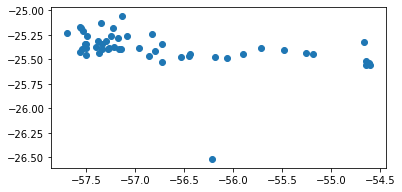

In [23]:
%matplotlib inline
comisaria.plot()

In [24]:
from fiona.crs import from_epsg
comisaria.crs = from_epsg("4326")

In [25]:
comisaria.to_file("datos/comisaria.shp", encoding='utf-8')

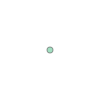

In [51]:
comisaria.loc[4, "geometry"]

In [52]:
data.shape

(18, 6)

In [62]:
data.columns

Index(['dpto', 'dpto_desc', 'cartodb_id', 'created_at', 'updated_at',
       'geometry'],
      dtype='object')

In [59]:
data.index

RangeIndex(start=0, stop=18, step=1)

In [57]:
data.head()

,dpto,dpto_desc,cartodb_id,created_at,updated_at,geometry
0,00,ASUNCION,1,2016-03-03,2016-03-03,"POLYGON ((443431.906300001 7209647.500100011, ..."
1,01,CONCEPCION,2,2016-03-03,2016-03-03,"POLYGON ((401542.3124999966 7557193.500000006,..."
2,02,SAN PEDRO,3,2016-03-03,2016-03-03,"POLYGON ((582918.4626000014 7422582.931500005,..."
3,03,CORDILLERA,4,2016-03-03,2016-03-03,"POLYGON ((505120.6480999999 7252404.617100011,..."
4,04,GUAIRA,5,2016-03-03,2016-03-03,"POLYGON ((568757.1251000005 7172178.500100013,..."


In [65]:
data.loc[3, "dpto_desc"]

'CORDILLERA'

In [66]:
data[data["dpto_desc"] == "ASUNCION"]

,dpto,dpto_desc,cartodb_id,created_at,updated_at,geometry
0,00,ASUNCION,1,2016-03-03,2016-03-03,"POLYGON ((443431.906300001 7209647.500100011, ..."


In [67]:
data["dpto_desc"]

0             ASUNCION
1           CONCEPCION
2            SAN PEDRO
3           CORDILLERA
4               GUAIRA
5             CAAGUAZU
6              CAAZAPA
7               ITAPUA
8             MISIONES
9            PARAGUARI
10         ALTO PARANA
11             CENTRAL
12            ÑEEMBUCU
13             AMAMBAY
14           CANINDEYU
15    PRESIDENTE HAYES
16            BOQUERON
17       ALTO PARAGUAY
Name: dpto_desc, dtype: object

In [69]:
data["geometry"].area / 1000000

0       128.328094
1     18528.902516
2     20836.718926
3      4786.707990
4      3867.593430
5     12898.556942
6      9544.537945
7     15860.562848
8      8153.869397
9      8595.885012
10    14212.283377
11     2411.404705
12    11668.274095
13    12548.738511
14    15063.438697
15    73661.366337
16    88615.886941
17    78610.738710
dtype: float64

In [71]:
serie = data["geometry"].area / 1000000
serie.sum()

399993.79447358917

In [76]:
data["geometry"].centroid


0     POINT (439100.4024200779 7202668.854587318)
1      POINT (488633.8169058361 7474173.30131433)
2      POINT (537462.1200400811 7326245.28894496)
3     POINT (503843.6714855988 7211683.357792198)
4     POINT (570130.4403734833 7142823.292711264)
5     POINT (612301.1294855285 7212434.750676905)
6      POINT (594340.124140422 7097187.295146433)
7      POINT (623439.709014612 7030598.559962536)
8      POINT (490578.6159769794 7022836.53864935)
9      POINT (486305.2768847744 7117946.45712231)
10    POINT (705993.4807497679 7189820.281161638)
11     POINT (449624.214393009 7174043.955060092)
12    POINT (410784.8234016887 7038478.362291971)
13    POINT (596213.9506378918 7469562.295098734)
14    POINT (680803.3320052824 7318799.504936581)
15    POINT (328034.0706295586 7387161.340299685)
16     POINT (78497.72902064386 7574622.30477204)
17    POINT (250856.2514935858 7720007.309397465)
dtype: object

In [79]:
import geopandas as gpd

shp1 = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(shp1)

shp2 = gpd.datasets.get_path('naturalearth_cities')
cities = gpd.read_file(shp2)

# For spatial join
countries = world[['geometry', 'name']]
countries = countries.rename(columns={'name':'country'})
cities_with_country = gpd.sjoin(cities, countries, how='inner', op='intersects')


In [84]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [85]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


In [83]:
cities_with_country.head()

,name,geometry,index_right,country
0,Vatican City,POINT (12.45338654497177 41.90328217996012),79,Italy
1,San Marino,POINT (12.44177015780014 43.936095834768),79,Italy
192,Rome,POINT (12.481312562874 41.89790148509894),79,Italy
2,Vaduz,POINT (9.516669472907267 47.13372377429357),9,Austria
184,Vienna,POINT (16.36469309674374 48.20196113681686),9,Austria


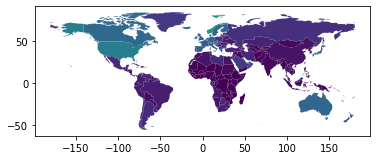

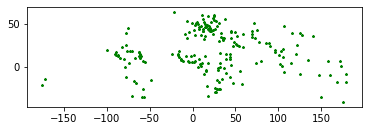

In [86]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap')

cities.plot(marker='*', color='green', markersize=5)


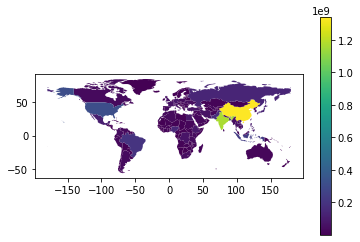

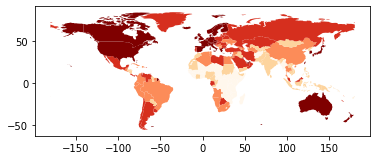

In [92]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

world.plot(column='pop_est',ax=ax, legend=True,legend_kwds={'label': "Population by Country",'orientation': "horizontal"})

world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles')